In [2]:
import sys
from ultralytics import YOLO
import cv2
import random
from glob import glob
import os
import matplotlib.pyplot as plt
from collections import Counter
import torch



In [ ]:
#Split dataset 70/20/10 train/val/test
#Source Code: https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
#Original Author: EdjeElectronics
#Original Source Code only Train/Val Split
#Modified by: Amina Jeyhan Rizky
!python train_val_test_split.py --datapath="c:/Users/aurel/Documents/Yolo_Detection/data" --train_pct=.7 --val_pct=.2 --test_pct=.1


Created folder at c:\Users\aurel\Documents\Yolo_Detection\data/train/images.
Created folder at c:\Users\aurel\Documents\Yolo_Detection\data/train/labels.
Created folder at c:\Users\aurel\Documents\Yolo_Detection\data/validation/images.
Created folder at c:\Users\aurel\Documents\Yolo_Detection\data/validation/labels.
Created folder at c:\Users\aurel\Documents\Yolo_Detection\data/test/images.
Created folder at c:\Users\aurel\Documents\Yolo_Detection\data/test/labels.
Number of image files: 3208
Number of annotation files: 3208
Images moving to train: 2245
Images moving to validation: 641
Images moving to test: 320


In [ ]:
# Check if GPU available
print("CUDA available:", torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --------------------------
# Load YOLO model
# --------------------------
model = YOLO("yolo11s.pt")  # or your custom model path
model.to(device)  # move YOLO model to GPU
print("Model device:", model.device)


In [ ]:
#Yolo Train with Epochs 50 and Image Size 640
#Best Trained model is train7 and trained in Google Colab using GPU T4
results = model.train(data="Datapath_to_your_config.yaml/config.yaml", epochs=50,imgsz=640)

In [ ]:
# Validate the model on the test set
dataset_path = "c:/Users/aurel/Documents/Yolo_Detection/data/"
model=YOLO("C:/Users/aurel/Documents/Yolo_Detection/runs/detect/train7/weights/best.pt")
metrics = model.val(data=os.path.join(dataset_path, "config.yaml"), split="test")

Ultralytics 8.3.229  Python-3.13.9 torch-2.9.1+cu130 CPU (AMD Ryzen 3 3250U with Radeon Graphics)
YOLO11s summary (fused): 101 layers, 9,416,283 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.30.1 ms, read: 1.72.6 MB/s, size: 41.4 KB)
val: Scanning C:\Users\aurel\Documents\Yolo_Detection\data\test\labels... 320 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 320/320 46.9it/s 6.8s<0.0s
val: New cache created: C:\Users\aurel\Documents\Yolo_Detection\data\test\labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 20/20 12.9s/it 4:1814.1s
                   all        320        440      0.916      0.874      0.921      0.832
                Windel         28         41      0.942      0.805      0.914      0.793
                   Bio         38        101      0.716      0.574      0.733      0.592
         Verbundkarton         41         42      0.977      0.995      0.992      0.947
         

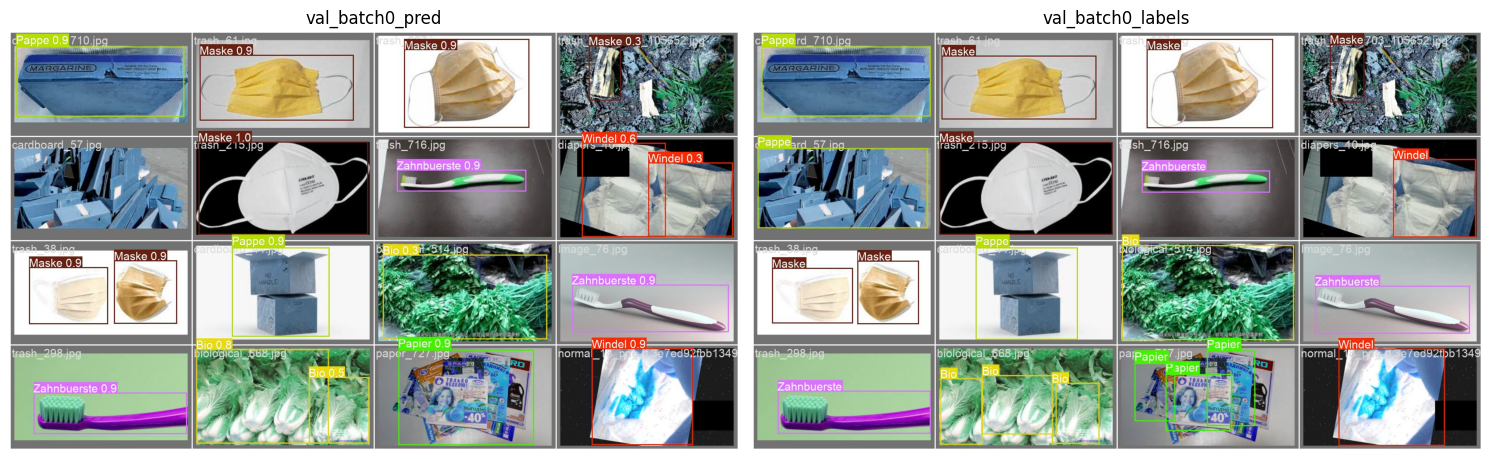

In [ ]:
# Validation images visualization
val_batch0_pred=cv2.imread("C:/Users/aurel/Documents/Yolo_Detection/runs/detect/val/val_batch0_pred.jpg")
val_batch0_labels=cv2.imread("C:/Users/aurel/Documents/Yolo_Detection/runs/detect/val/val_batch0_labels.jpg")

# Display images using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].imshow(val_batch0_pred)
axes[0].axis('off')
axes[0].set_title("val_batch0_pred")

axes[1].imshow(val_batch0_labels)
axes[1].axis('off')
axes[1].set_title("val_batch0_labels")

plt.tight_layout()
plt.show()